In [10]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [26]:
X = np.load("solutions/Xval_2.npy")
Y = np.load("solutions/Yval_2.npy")
Z = np.load("solutions/Zval_2.npy")

In [12]:
for i in range(168):
    X[i,i,:] = 0
    for j in range(8):
        Y[i,j,:] = 0
        Z[j,i,:] = 0

In [ ]:
def plot_prod(df):
    df = pd.DataFrame(np.sum(df, axis=2))
    df_give = pd.DataFrame(np.sum(np.sum(df, axis=2),axis=1))
    df_take = pd.DataFrame(np.sum(np.sum(df, axis=2),axis=0))
    df_give['country'] = pd.Series(pd.read_csv("data/final_prod.csv")["Area"].unique())
    df_take['country'] = pd.Series(pd.read_csv("data/final_prod.csv")["Area"].unique())
    df_net = pd.DataFrame(np.sum(np.sum(df, axis=2),axis=1) - np.sum(np.sum(df, axis=2),axis=0))
    df_net['country'] = pd.Series(pd.read_csv("data/final_prod.csv")["Area"].unique())
    df_take = df_take.join(pd.read_csv("data/final_prod.csv").loc[:,["Area","Area Abbreviation","longitude","latitude"]].drop_duplicates().set_index("Area"), how="inner", on="country")
    fig, ax = plt.subplots(figsize=(15,10))
    countriesg = gpd.read_file(  
        gpd.datasets.get_path("naturalearth_lowres"))
    countriesg=countriesg.join(df_take.set_index("Area Abbreviation"), how="inner", on="iso_a3").rename(columns={0:"value"})
    countriesg['log - zero'] = countriesg['value'].apply(lambda x : x - min(countriesg['value']))
    countriesg.plot(column='log - zero', cmap = "plasma", ax=ax, legend=True)
    ax.grid(b=True, alpha=0.5)
    plt.title("Absolute Food Consumption")
    plt.show()

In [29]:
df_take = df_take.join(pd.read_csv("data/final_prod.csv").loc[:,["Area","Area Abbreviation","longitude","latitude"]].drop_duplicates().set_index("Area"), how="inner", on="country")
# df_take["log"] = np.log10(df_take.loc[:,0])

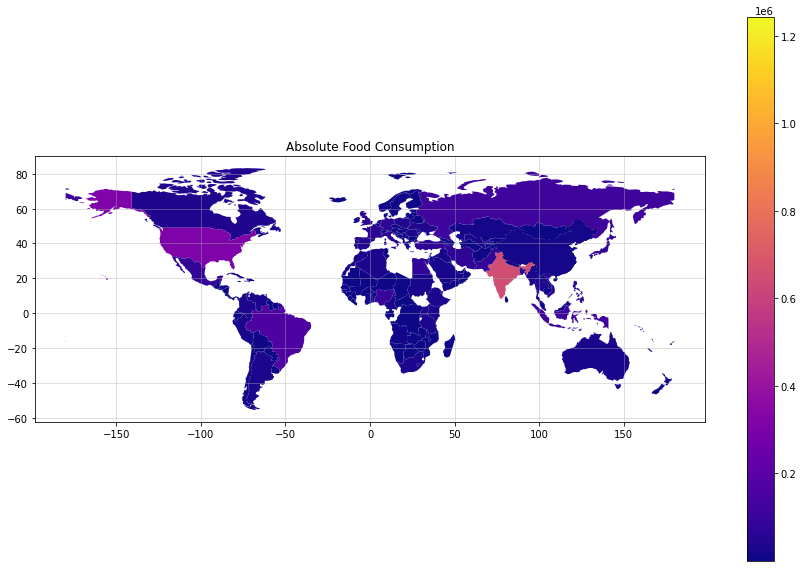

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
countriesg = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countriesg=countriesg.join(df_take.set_index("Area Abbreviation"), how="inner", on="iso_a3").rename(columns={0:"value"})
# countriesg['log - zero'] = countriesg['value'].apply(lambda x : x - min(countriesg['value']))
countriesg.plot(column='value', cmap = "plasma", ax=ax, legend=True)
ax.grid(b=True, alpha=0.5)
plt.title("Absolute Food Consumption")
plt.show()

In [34]:
df_give = df_give.join(pd.read_csv("data/final_prod.csv").loc[:,["Area","Area Abbreviation","longitude","latitude"]].drop_duplicates().set_index("Area"), how="inner", on="country")
# df_give["log"] = np.log10(df_give.loc[:,0])

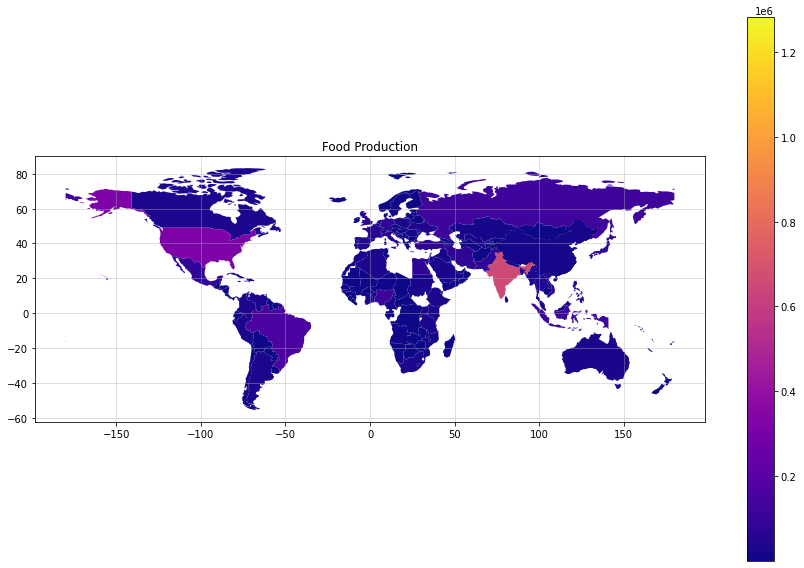

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countriest=countries.join(df_give.set_index("Area Abbreviation"), how="inner", on="iso_a3").rename(columns={0:"value"})
# countriest['log - zero'] = countriest['value'].apply(lambda x : x - min(countriest['value']))
countriest.plot(column='value', cmap = "plasma", ax=ax, legend=True)
ax.grid(b=True, alpha=0.5)
plt.title("Food Production")
plt.show()

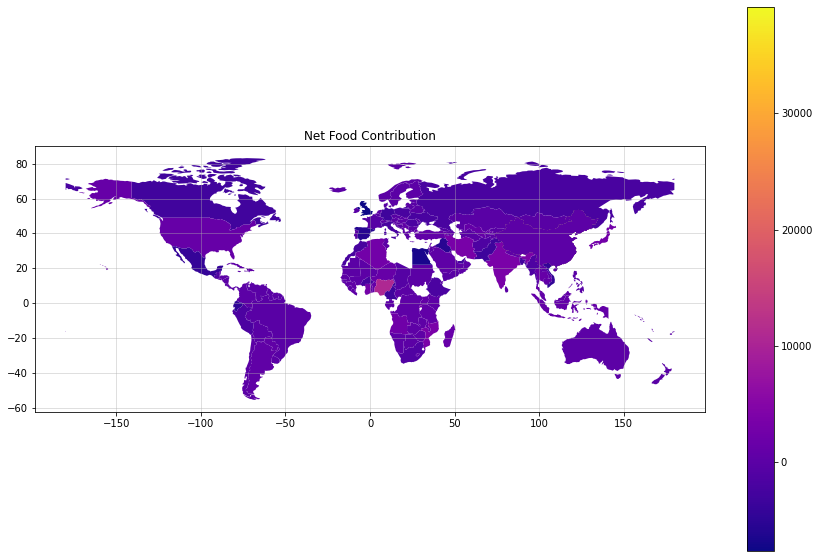

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
# countriest['log'] = countriest['value'].subtract(countriesg['value']).tolist()
df_net = df_net.join(pd.read_csv("data/final_prod.csv").loc[:,["Area","Area Abbreviation","longitude","latitude"]].drop_duplicates().set_index("Area"), how="inner", on="country")
countriest=countries.join(df_net.set_index("Area Abbreviation"), how="inner", on="iso_a3").rename(columns={0:"value"})
countriest.plot(column='value', cmap = "plasma", ax=ax, legend=True)
ax.grid(b=True, alpha=0.5)
plt.title("Net Food Contribution")
plt.show()